In [1]:
%run IDM_helper_functions.ipynb

16716.0
32130.0
32130.0
-7303.316329833018
-1141.064666877377
-1141.064666877377


In [2]:
# Training data  52500, W_neg = 8400
n_sim_train = 50000
prior_IDM = utils.BoxUniform(low=[0,51000,8000], high=[1,54000,8800])
param_IDM = prior_IDM.sample((n_sim_train,))
x_IDM_train = simul_IDM_C_Inh_Exc(np.array(param_IDM))



sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000
sim20000
sim21000
sim22000
sim23000
sim24000
sim25000
sim26000
sim27000
sim28000
sim29000
sim30000
sim31000
sim32000
sim33000
sim34000
sim35000
sim36000
sim37000
sim38000
sim39000
sim40000
sim41000
sim42000
sim43000
sim44000
sim45000
sim46000
sim47000
sim48000
sim49000


In [3]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior_IDM)
trainer = trainer.append_simulations(param_IDM, x_IDM_train)
mnle = trainer.train()


/Users/wangjiashun/Documents/GitHub/sbi/sbi/neural_nets/mnle.py:64: UserWarning: The mixed neural likelihood estimator assumes that x contains
        continuous data in the first n-1 columns (e.g., reaction times) and
        categorical data in the last column (e.g., corresponding choices). If
        this is not the case for the passed `x` do not use this function.
  this is not the case for the passed `x` do not use this function."""


 Neural network successfully converged after 55 epochs.

In [4]:
#
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")
#mcmc_parameters=dict(init_strategy="resample", num_chains=10, warmup_steps=100)
#mnle_posterior = trainer.build_posterior(mnle, prior)


In [4]:
# inference with different x_o that has 100 trials
#torch.manual_seed(41)
num_trials = 500
num_samples = 100
parameters_o = prior_IDM.sample((1,))
x_o = simul_IDM_C_Inh_Exc(np.array(parameters_o.repeat(num_trials, 1)))

sim0


In [5]:
mnle_posterior = trainer.build_posterior(mnle, prior_IDM)
mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

/Users/wangjiashun/Documents/GitHub/sbi/sbi/utils/sbiutils.py:321: UserWarning: An x with a batch size of 500 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  respect to entire batch, i.e,. p(theta | X)."""


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

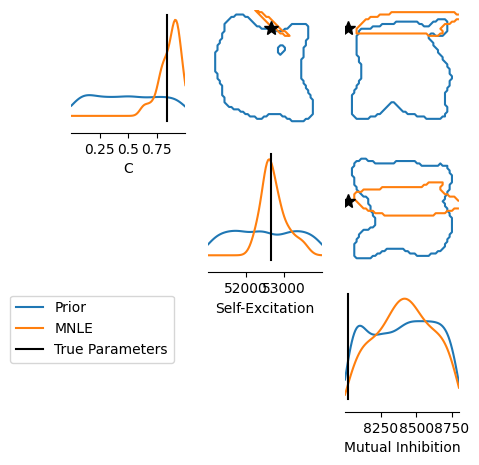

In [7]:
# num_trials = 500
pair_plot(prior_IDM, mnle_samples, parameters_o, figsize = (5,5), contour = 0.7, 
          labels=["C", "Self-Excitation", "Mutual Inhibition"])


In [ ]:
n_trials = 300
sim_num = 20
prior_IDM = utils.BoxUniform(low=[0,51000,8000], high=[1,54000,8800])

param_IDM = prior_IDM.sample((sim_num,))
par_fitted = np.zeros((sim_num,param_IDM.shape[1]))
for i in range(sim_num):
    print(i)
    IDM_o = simul_IDM_C_Inh_Exc(np.tile(param_IDM[i,:], (n_trials,1))) 

    mcmc_parameters = dict(num_chains=10,thin=10,warmup_steps=50,init_strategy="proposal")
    mnle_posterior = trainer.build_posterior(prior = prior_IDM, 
                                             mcmc_method="slice_np_vectorized",  
                                             mcmc_parameters=mcmc_parameters)

    mnle_posterior.set_default_x(IDM_o)
    mnle_map = mnle_posterior.map()

    par_fitted[i,:] = np.array(mnle_map)

In [ ]:

par_labels = ["Self-Excitation", "Mutual Inhibition"]
par_fitted_labels = ["Self-Excitation", "Mutual Inhibition"]
sim_fit_plot_all(param_IDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(8,8))

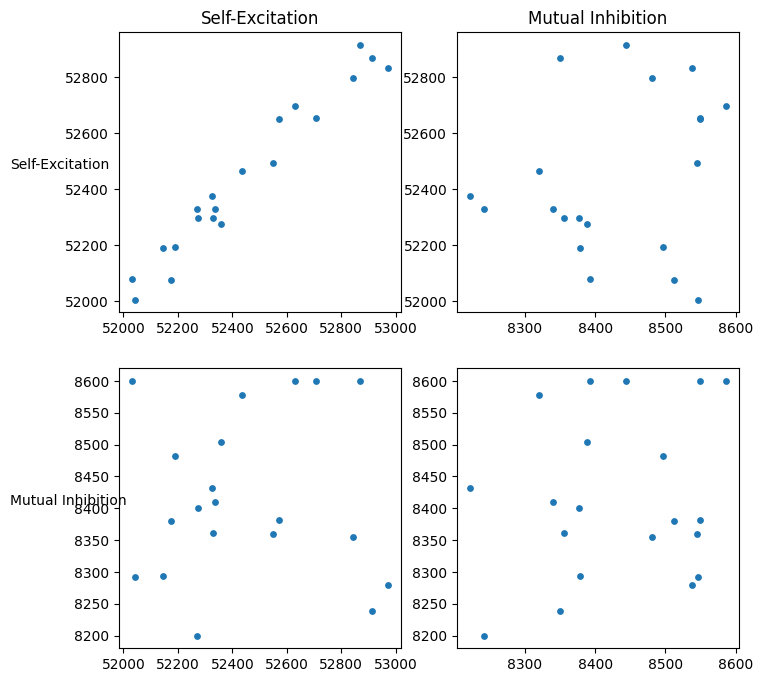

In [25]:
## n_trials = 300 change the MCMC_parameters to default
par_labels = ["Self-Excitation", "Mutual Inhibition"]
par_fitted_labels = ["Self-Excitation", "Mutual Inhibition"]
sim_fit_plot_all(param_IDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(8,8))

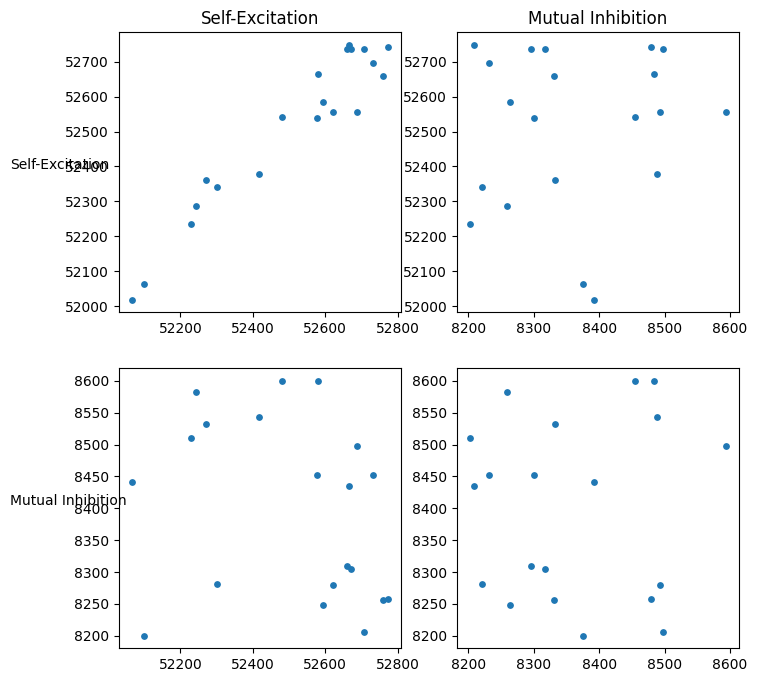

In [17]:
## n_trials = 300
par_labels = ["Self-Excitation", "Mutual Inhibition"]
par_fitted_labels = ["Self-Excitation", "Mutual Inhibition"]
sim_fit_plot_all(param_IDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(8,8))

In [68]:
n_trials = 200
num_samples = 500
sim_num = 20
prior_IDM = utils.BoxUniform(low=[51000,8000], high=[54000,8800])


In [ ]:
param_IDM = prior_IDM.sample((sim_num,))
par_fitted = np.zeros((sim_num,param_IDM.shape[1]))
for i in range(sim_num):
    print(i)
    IDM_o = simul_IDM_Inh_Exc(np.tile(param_IDM[i,:], (n_trials,1))) # 

    mcmc_parameters = dict(num_chains=10,thin=10,warmup_steps=50,init_strategy="proposal")
    mnle_posterior = trainer.build_posterior(mnle, 
                                             prior_IDM, 
                                             mcmc_method="slice_np_vectorized", 
                                             mcmc_parameters=mcmc_parameters)
    
    # get the posterior samples
    mnle_samples = mnle_posterior.sample((num_samples,), x=IDM_o)
    post_mean = np.array(mnle_samples.mean(axis = 0))
    print(param_IDM[i,:])
    print(post_mean)
    par_fitted[i,:] = post_mean

0
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([53588.5117,  8414.4844])
[53593.695  8556.193]
1
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([51660.1914,  8160.5830])
[51671.457  8370.804]
2
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([53746.9453,  8564.3359])
[53580.492  8426.638]
3
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([51590.2266,  8665.9307])
[51620.11   8501.694]
4
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([51274.0039,  8261.6318])
[51288.562  8344.918]
5
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

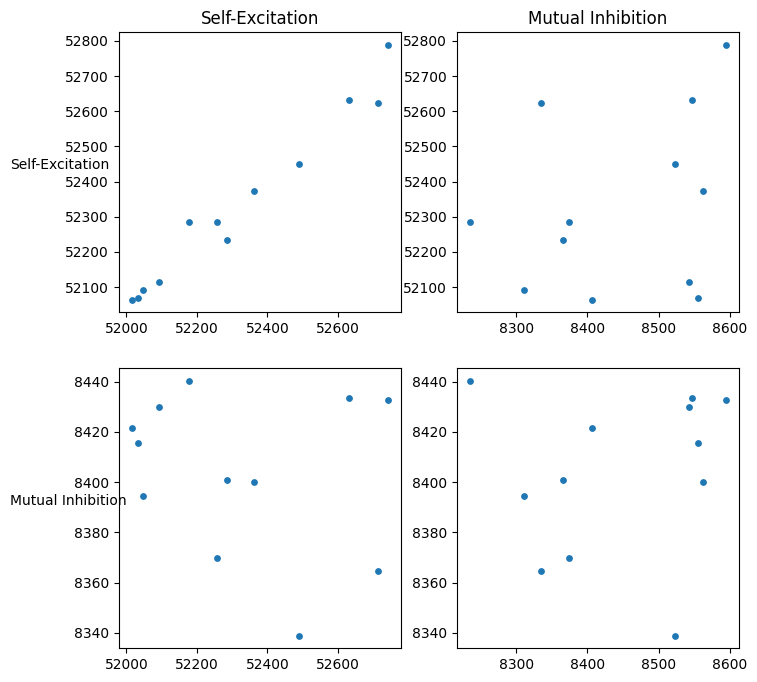

In [64]:
## n_trials = 300
par_labels = ["Self-Excitation", "Mutual Inhibition"]
par_fitted_labels = ["Self-Excitation", "Mutual Inhibition"]
sim_fit_plot_all(param_IDM[0:12,:], par_fitted[0:12,:], par_labels, par_fitted_labels, s = 15, figsize=(8,8))


In [42]:


mnle_posterior = trainer.build_posterior(prior = prior_IDM)
mnle_posterior.set_default_x(x_o)
mnle_map = mnle_posterior.map()

In [35]:
mnle_samples.mean(axis = 0)

tensor([52684.1406,  8394.2861])

In [63]:
param_IDM

tensor([[52177.5781,  8234.9609],
        [52032.0312,  8554.4590],
        [52712.1562,  8334.4307],
        [52285.8398,  8366.1318],
        [52361.7695,  8562.0693],
        [52092.7383,  8542.4902],
        [52257.8945,  8373.7188],
        [52741.2266,  8594.3184],
        [52489.3164,  8522.0615],
        [52631.3398,  8545.9443],
        [52014.8281,  8405.7832],
        [52047.5820,  8310.4395],
        [52951.9062,  8318.0166],
        [52004.1602,  8456.3682],
        [52858.1562,  8282.7783],
        [52601.0547,  8491.3115],
        [52746.4414,  8455.9863],
        [52884.5898,  8455.4971],
        [52722.8086,  8358.4023],
        [52308.7969,  8556.6738]])